<a href="https://colab.research.google.com/github/FilipeCamello/lia1-2023-2/blob/main/Jogar_Tenis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Classificação

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
jogar_tenis = pd.read_csv('/content/drive/MyDrive/JogarTenis.csv')

In [14]:
jogar_tenis

,Tempo,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Nao
1,Ensolarado,Quente,Alta,Forte,Nao
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agradavel,Normal,Fraco,Sim
5,Chuvoso,Agradavel,Normal,Forte,Nao
6,Nublado,Agradavel,Normal,Forte,Sim
7,Ensolarado,Moderada,Alta,Fraco,Não
8,Ensolarado,Agradavel,Normal,Fraco,Sim
9,Chuvoso,Moderada,Normal,Fraco,Sim


In [15]:
X_jogar_tenis = jogar_tenis.iloc[:, 0:4].values
X_jogar_tenis

array([['Ensolarado', 'Quente', 'Alta', 'Fraco'],
       ['Ensolarado', 'Quente', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Alta', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Fraco'],
       ['Chuvoso', 'Agradavel', 'Normal', 'Fraco'],
       ['Chuvoso', 'Agradavel', 'Normal', 'Forte'],
       ['Nublado', 'Agradavel', 'Normal', 'Forte'],
       ['Ensolarado', 'Moderada', 'Alta', 'Fraco'],
       ['Ensolarado', 'Agradavel', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Normal', 'Fraco'],
       ['Ensolarado', 'Moderada', 'Normal', 'Forte'],
       ['Nublado', 'Moderada', 'Alta', 'Fraco'],
       ['Nublado', 'Quente', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Forte']], dtype=object)

In [16]:
y_jogar_tenis = jogar_tenis.iloc[:, 4].values
y_jogar_tenis

array(['Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Nao'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [18]:
X_jogar_tenis[:,0] = label_encoder_historia.fit_transform(X_jogar_tenis[:,0])
X_jogar_tenis[:,1] = label_encoder_divida.fit_transform(X_jogar_tenis[:,1])
X_jogar_tenis[:,2] = label_encoder_garantia.fit_transform(X_jogar_tenis[:,2])
X_jogar_tenis[:,3] = label_encoder_renda.fit_transform(X_jogar_tenis[:,3])

In [19]:
X_jogar_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [20]:
import pickle
with open('jogar_tenis.pkl', 'wb') as f:
  pickle.dump([X_jogar_tenis, y_jogar_tenis], f)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
with open('/content/jogar_tenis.pkl', 'rb') as f:
  X_jogar_tenis, y_jogar_tenis = pickle.load(f)

In [23]:
X_jogar_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [24]:
y_jogar_tenis

array(['Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Nao'], dtype=object)

In [25]:
arvore_jogar_tenis = DecisionTreeClassifier(criterion = 'entropy')

arvore_jogar_tenis.fit(X_jogar_tenis, y_jogar_tenis)

DecisionTreeClassifier(criterion='entropy')

In [26]:
arvore_jogar_tenis.feature_importances_

array([0.4721032 , 0.19192496, 0.09596248, 0.24000936])

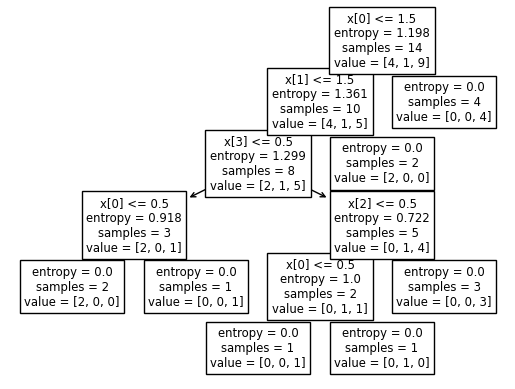

In [27]:
from sklearn import tree
tree.plot_tree(arvore_jogar_tenis);

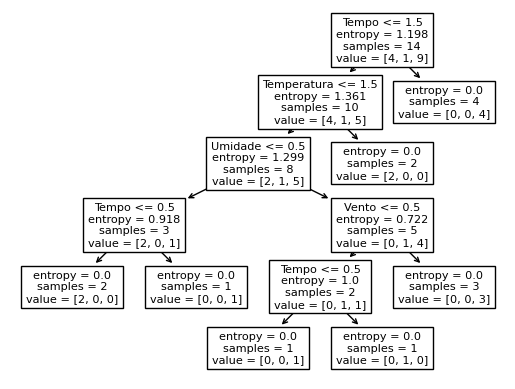

In [28]:
previsores = ['Tempo', 'Temperatura', 'Vento', 'Umidade']
tree.plot_tree(arvore_jogar_tenis, feature_names = previsores);

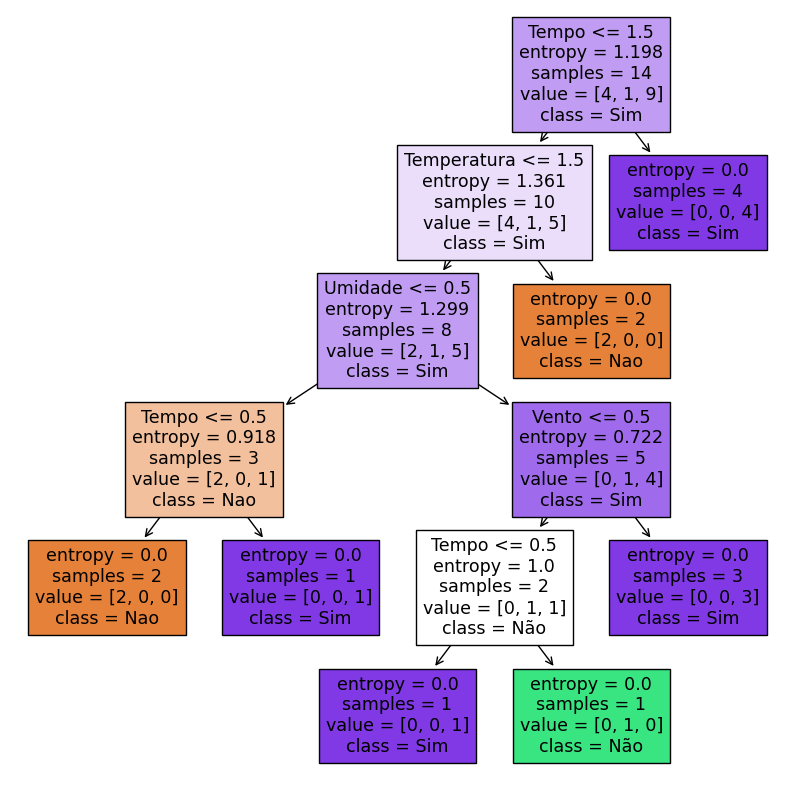

In [29]:
import matplotlib.pyplot as plt
previsores = ['Tempo', 'Temperatura', 'Vento', 'Umidade']
figure, eixos = plt.subplots (nrows = 1, ncols = 1, figsize = (10, 10))
tree.plot_tree(arvore_jogar_tenis, feature_names = previsores, class_names = arvore_jogar_tenis.classes_, filled = True);